# ENHANCING NETWORK SECURITY THROUGH SUPERVISED LEARNING-BASED ANOMALY DETECTION IN NETWORK TRAFFIC 

# Objectives to be achieved
- To collect network traffic data from public datasets, preprocess it perform feature extraction to find relevant features.
- To develop models using multiple algorithms and train them using the preprocessed data. 
- To evaluate the performance of the developed models and settle on the best performing model.
- To create visualizations illustrating the detected anomalies in network traffic. 


# Importing necessary libraries 

NumPy and Pandas, two crucial Python libraries for data manipulation and numerical calculations, are imported. The directory "C:/Users/Ouma Becks/Desktop/NAD" is then traversed using the os.walk() method, which lists every filename found there.

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('"C:/Users/Ouma Becks/Desktop/NAD"'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Imported are necessary libraries for assessment, machine learning, visualization, and data processing.  Seaborn and Matplotlib help with data visualization, while NumPy and Pandas manage numerical calculations and data manipulation.  While warnings prevent pointless alarms, multiprocessing and itertools offer performance improvement and iteration tools, respectively.  The script uses RFE for feature selection, StandardScaler and LabelEncoder for preprocessing, and train_test_split from Scikit-Learn for dataset dividing.  For categorization problems, machine learning models like Support Vector Machine (SVM) and Logistic Regression are imported.  Lastly, a number of assessment measures are included to evaluate the performance of the model, including as accuracy_score, confusion_matrix, and roc_curve.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import multiprocessing
import itertools
import warnings

from collections import Counter
from pandas.api.types import is_numeric_dtype

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC as svm

# Metrics & Evaluation
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score, 
    f1_score, roc_auc_score, classification_report, precision_recall_curve,
    r2_score, mean_squared_error, roc_curve
)

# Suppress warnings
warnings.filterwarnings("ignore")

# Reading the Training Dataset

Uses Pandas' read_csv() function to retrieve a dataset from the Test.txt file in the "C:\Users\Ouma Becks\Desktop\NAD" directory and store it in the data DataFrame.  The dataset's first five rows are then shown using the head() function to give a brief synopsis of its composition.

In [3]:
data = pd.read_csv(r'C:\Users\Ouma Becks\Desktop\NAD\Test.txt')
data.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


Displays a glimpse of the dataset's structure, including its columns and sample values, in the first five rows of the data DataFrame. 

A brief overview of the dataset is given by the data.info() function, which also shows the number of non-null items, column names, data types, and memory utilization.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        22543 non-null  int64  
 1   tcp      22543 non-null  object 
 2   private  22543 non-null  object 
 3   REJ      22543 non-null  object 
 4   0.1      22543 non-null  int64  
 5   0.2      22543 non-null  int64  
 6   0.3      22543 non-null  int64  
 7   0.4      22543 non-null  int64  
 8   0.5      22543 non-null  int64  
 9   0.6      22543 non-null  int64  
 10  0.7      22543 non-null  int64  
 11  0.8      22543 non-null  int64  
 12  0.9      22543 non-null  int64  
 13  0.10     22543 non-null  int64  
 14  0.11     22543 non-null  int64  
 15  0.12     22543 non-null  int64  
 16  0.13     22543 non-null  int64  
 17  0.14     22543 non-null  int64  
 18  0.15     22543 non-null  int64  
 19  0.16     22543 non-null  int64  
 20  0.17     22543 non-null  int64  
 21  0.18     225

An overview of the dataset is given, along with the total number of entries (rows) and columns.  In order to aid detect missing data, it provides the name of each column, the data type (such as integer, float, or object), and the number of non-null values. 

The first value in the tuple returned by data.shape specifies the number of rows (data samples) and the second value indicates the number of columns (features), which together reflect the dataset's dimensions.

In [5]:
data.shape

(22543, 43)

(22543, 43), where 43 is the number of columns (features) and 22,543 is the number of rows (data samples). The size of the dataset is confirmed by this output, making it possible to determine how much data is accessible for modeling and analysis.

The data.describe() function creates summary statistics for numerical columns in the dataset, including count, mean, standard deviation, minimum, and quartiles.

In [6]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,21
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


A statistical overview of all the dataset's numerical columns can be found above.  It contains the mean, which is the average value, and the count, which indicates how many non-null values there are in each column.  Understanding variability is aided by the standard deviation (std), which shows the distribution of data.  The range of data for each feature is given by the minimum (min) and maximum (max) values.

data.describe(include='object') generates summary statistics for categorical (object-type) columns in the dataset.

In [7]:
data.describe(include='object')

,tcp,private,REJ,neptune
count,22543,22543,22543,22543
unique,3,64,11,38
top,tcp,http,SF,normal
freq,18879,7853,14875,9711


An overview of the dataset's category columns can be found above.  The number of distinct categories, the most common category (top), the frequency of that category (freq), and the total count of non-null values in each categorical column are all included.

# Data Preprocessing
* Missing Values
* Duplicates
* Label Encoding

**Missing Values**

data.isnull(). Sum() counts the number of null (NaN) entries in each column to check for missing values in the dataset.

In [8]:
data.isnull().sum()

0          0
tcp        0
private    0
REJ        0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
0.16       0
0.17       0
0.18       0
229        0
10         0
0.00       0
0.00.1     0
1.00       0
1.00.1     0
0.04       0
0.06       0
0.00.2     0
255        0
10.1       0
0.04.1     0
0.06.1     0
0.00.3     0
0.00.4     0
0.00.5     0
0.00.6     0
1.00.2     0
1.00.3     0
neptune    0
21         0
dtype: int64

The column names in the Pandas series above serve as the index, while the values indicate how many records are missing from each column.

**Duplicates**

data.duplicated(). sum(), which checks for repeated entries and sums them up. 

In [9]:
print(f"Number of duplicates: {data.duplicated().sum()}")

Number of duplicates: 0


The total number of duplicate rows in the dataset is shown above.  Since 0 indicates that there are no duplicate entries, every record is guaranteed to be distinct.

**Label Encoding**

Function le(df) iterates through each column of df, determining whether a column contains the data type "object." Label Encoding is then used to use LabelEncoder() to translate these categorical values into numerical representations.

In [10]:
label_encoder = LabelEncoder()
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                df[col] = label_encoder.fit_transform(df[col])

le(data)
data

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,1,45,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14,21
1,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16,21
2,0,0,13,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24,15
3,1,1,55,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,11
4,0,1,22,9,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,49,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16,21
22539,0,1,22,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16,21
22540,0,1,22,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,15
22541,0,2,11,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16,21


Above is a modified version of the data DataFrame where all categorical (object-type) columns have been transformed into numerical values using Label Encoding. Each unique category in a column is assigned a unique integer value, meaning that previously text-based features are now represented as numbers.

# Train Data

Uses a comma as a delimiter and manually assigns column names to match the dataset's features after reading a dataset from the "Train.txt" file, which is located at C:\Users\Ouma Becks\Desktop\NAD.  The loaded DataFrame's first five rows are then shown via the df.head() function, enabling a preliminary examination of the dataset's composition and organization.

In [11]:
df = pd.read_csv(r'C:\Users\Ouma Becks\Desktop\NAD\Train.txt',sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


Displayed are the first five rows of the dataset, showing how the data is structured across the specified columns. Each row represents a network traffic instance with multiple features numerical values related to network activity. The last two columns, attack and lastflag, indicate whether the instance is a normal or attack-related event and an additional categorical flag.

The first value in the tuple returned by data.shape specifies the number of rows (data samples) and the second value indicates the number of columns (features), which together reflect the dataset's dimensions.

In [12]:
df.shape

(125973, 43)

(22543, 43), where 43 is the number of columns (features) and 22,543 is the number of rows (data samples). The size of the dataset is confirmed by this output, making it possible to determine how much data is accessible for modeling and analysis.

The data.describe() function creates summary statistics for numerical columns in the dataset, including count, mean, standard deviation, minimum, and quartiles.

In [13]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


A statistical overview of all the dataset's numerical columns can be found above. It contains the mean, which is the average value, and the count, which indicates how many non-null values there are in each column. Understanding variability is aided by the standard deviation (std), which shows the distribution of data. The range of data for each feature is given by the minimum (min) and maximum (max) values.

With axis=1 to indicate column-wise deletion, the drop() function is used to remove the columns 'land', 'urgent', 'numfailedlogins', and 'numoutboundcmds' from the DataFrame df. The inplace=True argument guarantees that the changes are applied directly to df without requiring assignment to a new variable.

In [14]:
# Drop unnecessary columns
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

As we can see 'land', 'urgent', 'numfailedlogins', 'numoutboundcmds' have mostly zero values so we can drop these columns.

data.isnull(). Sum() counts the number of null (NaN) entries in each column to check for missing values in the dataset.

In [15]:
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

The column names in the Pandas series above serve as the index, while the values indicate how many records are missing from each column.

To successfully filter out categorical or object-type columns, df.select_dtypes(exclude=[np.number]) picks those columns in the DataFrame df that are not numeric. 

In [16]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


Printed above is a DataFrame (df) that selects only columns that are non-numeric. 

Modifies the 'attack' column in the DataFrame df by replacing any value that is not 'normal' with the string 'attack'. 

In [17]:
df['attack'].loc[df['attack']!='normal']='attack'

 LabelEncoder() to convert categorical columns—protocoltype, service, flag, and attack—into numerical values, making them suitable for machine learning algorithms. 

In [18]:
le=LabelEncoder()
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

# Correlation Matrix

Calculates the correlation matrix of a DataFrame (df) to measure the linear relationships between its numerical variables, then visualizes it as a heatmap with annotated values. 

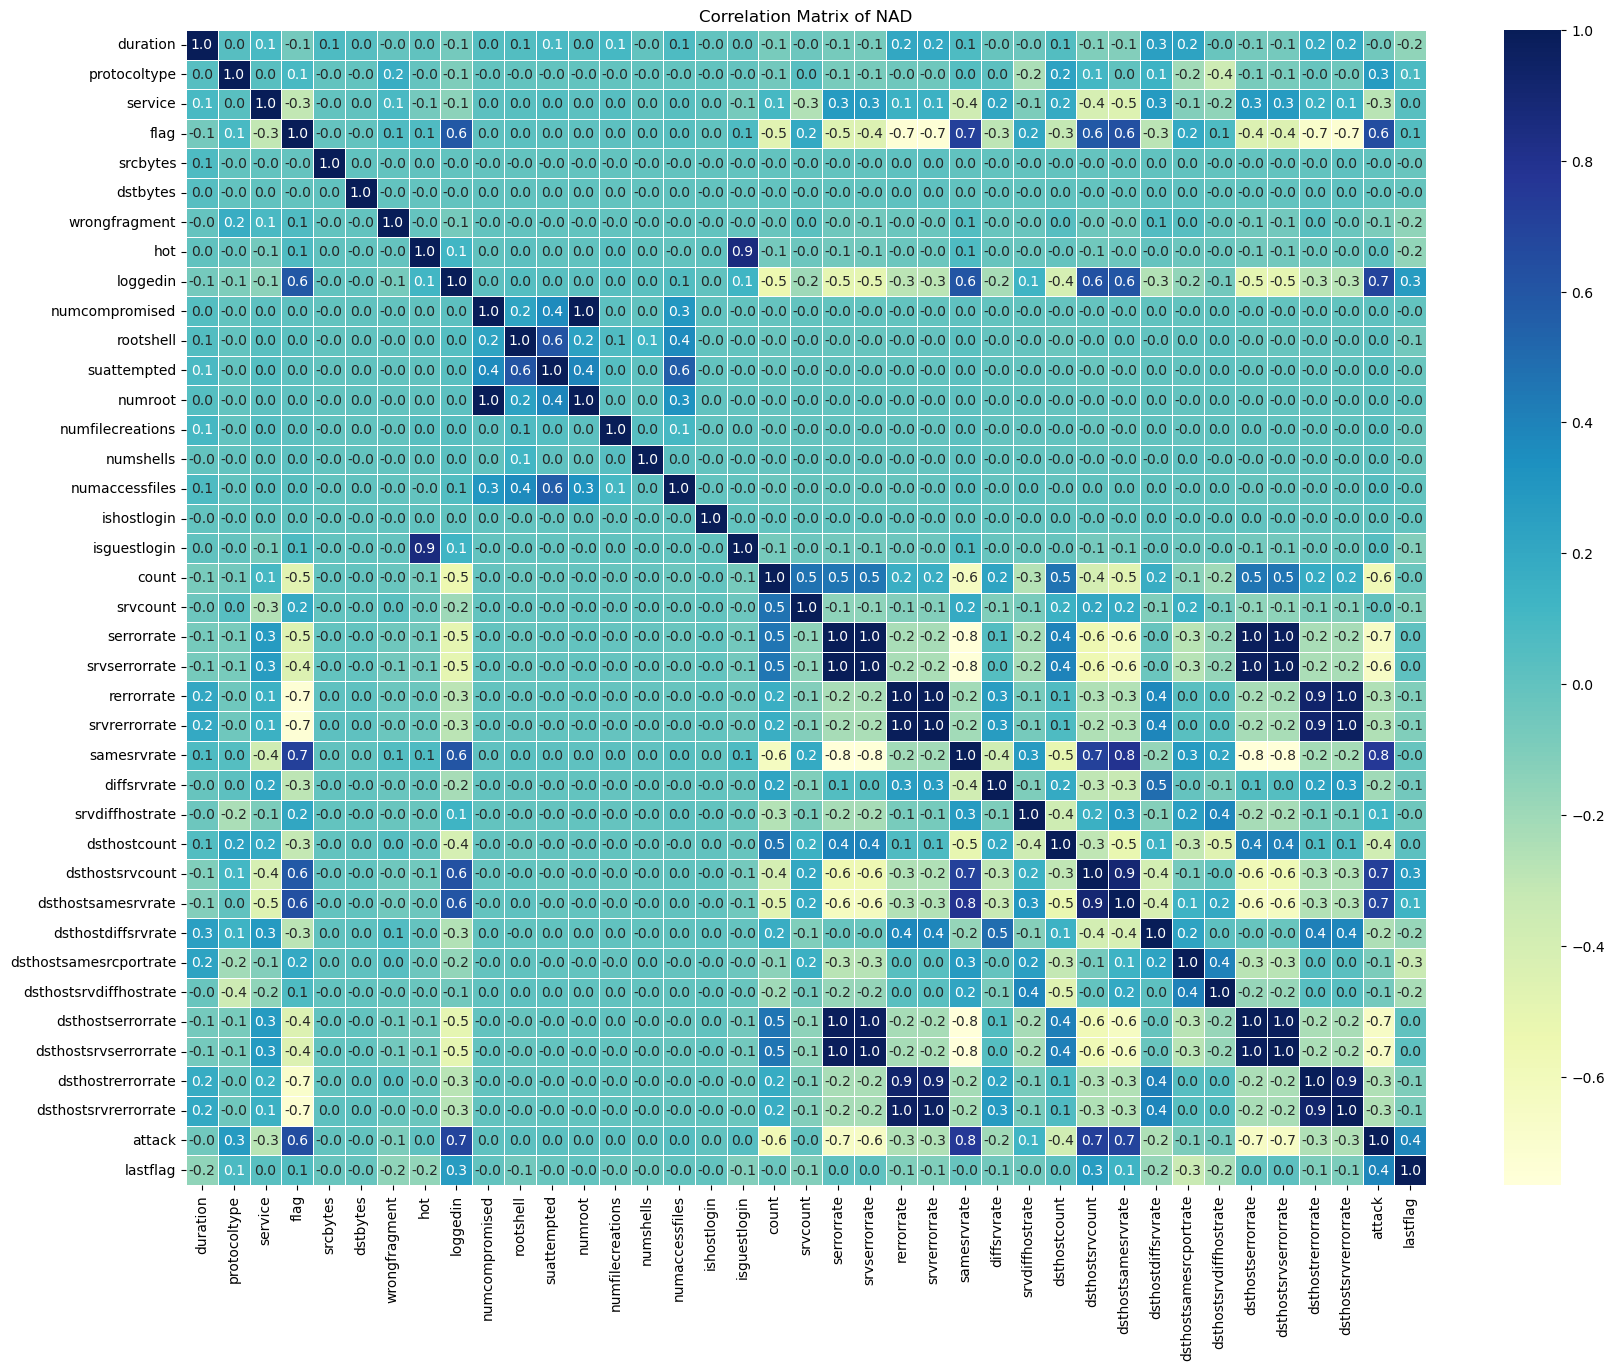

In [19]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix with values
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix of NAD')
plt.show()

The heatmap uses a blue-green color gradient (YlGnBu), displays correlation values rounded to one decimal place, and includes a title ("Correlation Matrix of NAD") for context.

# Feature selection

First filters a correlation matrix to include only the specified features ('duration', 'srcbytes', 'dstbytes', 'count', 'srvcount', and 'attack') from the DataFrame df, then generates a heatmap to visualize their pairwise correlations.

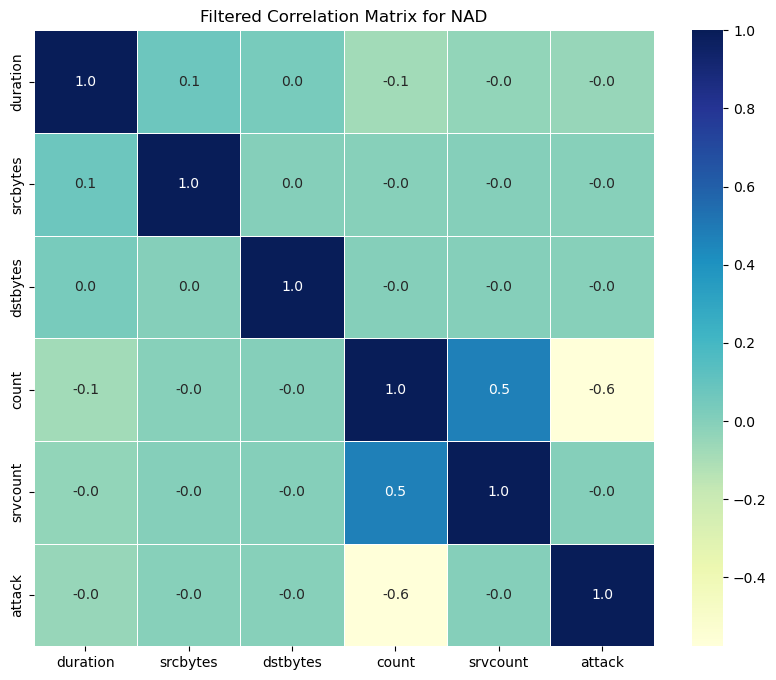

In [20]:
# Filter the correlation matrix for specific features
selected_features = ['duration', 'srcbytes', 'dstbytes', 'count', 'srvcount', 'attack']
filtered_corr_matrix = df[selected_features].corr()

# Plot the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Filtered Correlation Matrix for NAD')
plt.show()

The heatmap uses a blue-green color scale, displays numerical values with one decimal place (annot=True, fmt=".1f"), and includes a title ('Filtered Correlation Matrix for NAD') for clarity.


Separates the feature variables (X) and the target variable (y) from the DataFrame df by dropping the "attack" column from X while keeping it as y. 

In [21]:
X=df.drop(['attack'],axis=1)
y=df['attack']

Outputs the class distribution of y using the Counter function from the collections module, which counts the occurrences of each unique class label in y. 

In [22]:
print("Class distribution: {}".format(Counter(y)))

Class distribution: Counter({1: 67343, 0: 58630})


The result is displayed as a dictionary-like format within a string, showing each unique class and its corresponding frequency.

Splits the dataset into training and testing subsets, with 70% of the data assigned to training (X_train, y_train) and 30% to testing (X_test, y_test). The random_state=42 ensures reproducibility, meaning the split remains consistent across multiple runs.

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Selects the top 10 most relevant features from the dataset using the ANOVA F-test, which evaluates the statistical relationship between each feature and the target variable. It then applies this selection to both the training and test datasets, and prints the names of the chosen features, which are expected to be the most predictive in the given classification task.

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features using ANOVA F-test
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['flag', 'loggedin', 'count', 'serrorrate', 'srvserrorrate',
       'samesrvrate', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostserrorrate', 'dsthostsrvserrorrate'],
      dtype='object')


Printed are the names of the chosen features, which are expected to be the most predictive in the given classification task.

# Implementing ML Models for Train Data
**Model Selection**
* Logistic Regression 
* Support Vector Machine (SVM) 

**Using Logistic Regression**

Scales the selected features using StandardScaler, which standardizes the data by removing the mean and scaling to unit variance, or alternatively, MinMaxScaler, which scales features to a specific range. It first fits the scaler to X_train_selected and transforms it, then applies the same transformation to X_test_selected, ensuring consistency, while target_names defines class labels as "attack" and "normal" for a classification task.

In [25]:
# Scale the selected features
scaler = StandardScaler()  # Or MinMaxScaler() depending on the use case
X_train_transformed = scaler.fit_transform(X_train_selected)  # Fit on training data
X_test_transformed = scaler.transform(X_test_selected)  # Transform test data using same scaler

target_names = ["attack", "normal"]

Initializes Logistic Regression model for classification, beginning with training the model using the fit() method on a transformed training dataset (X_train_transformed, y_train). It then makes predictions on the transformed test dataset (X_test_transformed) and evaluates the model’s accuracy using score(), which compares the predictions against actual test labels (y_test).

To further analyze performance, the code generates a classification report with precision, recall, and F1-score metrics, and plots a confusion matrix using seaborn.heatmap(). Finally, it extracts True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP) from the confusion matrix to provide deeper insight into the model's performance.

============================== Logistic Regression ==============================

Logistic Regression Accuracy: 0.9156435224386114


Logistic Regression Classification Report of NAD:

              precision    recall  f1-score   support

      attack       0.93      0.89      0.91     17709
      normal       0.90      0.94      0.92     20083

    accuracy                           0.92     37792
   macro avg       0.92      0.91      0.92     37792
weighted avg       0.92      0.92      0.92     37792



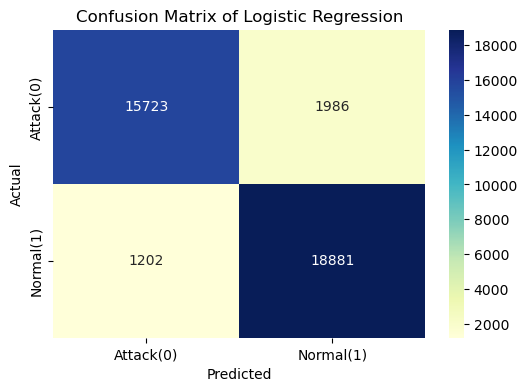


Confusion Matrix Parameters for Logistic Regression:
True Negatives (TN): 15723
False Positives (FP): 1986
False Negatives (FN): 1202
True Positives (TP): 18881


In [26]:
print('============================== Logistic Regression ==============================')

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

# Make predictions using the trained logistic regression model
lr_pred = lr.predict(X_test_transformed)

# Calculate accuracy score correctly
lr_accuracy_score = lr.score(X_test_transformed, y_test)  # Match with test labels
print(f"\nLogistic Regression Accuracy: {lr_accuracy_score}\n")

# Print classification report
print("\nLogistic Regression Classification Report of NAD:\n")
print(classification_report(y_test, lr_pred, target_names=target_names))

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=["Attack(0)", "Normal(1)"], 
            yticklabels=["Attack(0)", "Normal(1)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

# Extract TN, FP, FN, TP values
tn, fp, fn, tp = cm.ravel()
print('\nConfusion Matrix Parameters for Logistic Regression:')
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)

 Logistic Regression model achieved an accuracy of 91.56%, indicating strong overall performance. The classification report shows that the model performs well in distinguishing between "attack" and "normal" traffic, with both classes having high precision (93% for attack, 90% for normal) and recall (89% for attack, 94% for normal), resulting in balanced F1-scores around 91-92%.

The confusion matrix reveals that out of 37,792 total samples, the model correctly classified 15,723 attack instances (TN) and 18,881 normal instances (TP), but misclassified 1,986 normal samples as attacks (FP) and 1,202 attack samples as normal (FN).

**Using SVM**

Initializes and trains a Support Vector Machine (SVM) model using the SVC() class. It fits the model on the transformed training dataset (X_train_transformed) and its corresponding labels (y_train). After training, the model makes predictions on the transformed test dataset (X_test_transformed), and its accuracy is calculated by comparing predictions with the actual test labels (y_test). The classification performance is further evaluated using a classification report, which provides metrics such as precision, recall, and F1-score for different classes.

A confusion matrix is computed and visualized using a heatmap to show the distribution of correct and incorrect predictions. The plot labels distinguish between attack (0) and normal (1) classes. The confusion matrix values are then extracted, displaying the count of true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP). 

============================== Support Vector Machine (SVM) ==============================

SVM Accuracy: 0.9513918289585097


SVM Classification Report of NAD:

              precision    recall  f1-score   support

      attack       0.98      0.92      0.95     17709
      normal       0.93      0.98      0.96     20083

    accuracy                           0.95     37792
   macro avg       0.95      0.95      0.95     37792
weighted avg       0.95      0.95      0.95     37792



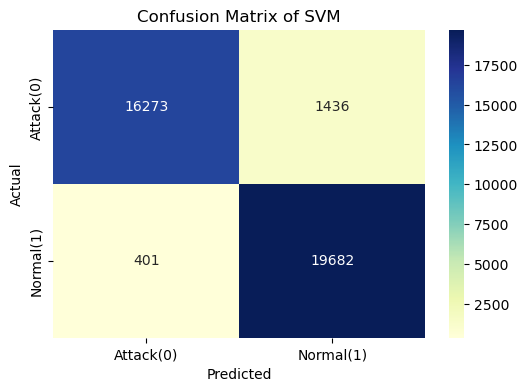


Confusion Matrix Parameters for Support Vector Machine (SVM):
True Negatives (TN): 16273
False Positives (FP): 1436
False Negatives (FN): 401
True Positives (TP): 19682


In [27]:
print('============================== Support Vector Machine (SVM) ==============================')

# Train SVM model
svm = SVC()
svm.fit(X_train_transformed, y_train)

# Make predictions using the trained SVM model
svm_pred = svm.predict(X_test_transformed)

# Calculate accuracy score correctly
svm_accuracy_score = svm.score(X_test_transformed, y_test)  # Match with test labels
print(f"\nSVM Accuracy: {svm_accuracy_score}\n")

# Print classification report
print("\nSVM Classification Report of NAD:\n")
print(classification_report(y_test, svm_pred, target_names=target_names))

# Compute confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=["Attack(0)", "Normal(1)"], 
            yticklabels=["Attack(0)", "Normal(1)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of SVM")
plt.show()

# Extract TN, FP, FN, TP values
tn, fp, fn, tp = cm.ravel()
print('\nConfusion Matrix Parameters for Support Vector Machine (SVM):')
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)

SVM model achieves an accuracy of 95.14%, indicating strong performance in distinguishing between attack and normal traffic. The classification report shows high precision (0.98 for attack, 0.93 for normal) and recall (0.92 for attack, 0.98 for normal), suggesting that the model effectively identifies both classes. The f1-scores (0.95 for attack, 0.96 for normal) indicate a good balance between precision and recall. The macro and weighted averages also confirm the model's robustness in handling class distribution.

The confusion matrix reveals that 16,273 attack samples were correctly classified (TN), while 1,436 normal samples were misclassified as attacks (FP). Similarly, 401 attack samples were mistakenly classified as normal (FN), and 19,682 normal samples were correctly identified (TP).

# Receiver Operating Characteristic (ROC) Curve for Anomaly Detection

 plot_roc_curve is designed to generate Receiver Operating Characteristic (ROC) curves for multiple models, allowing for a visual comparison of their performance. It takes the true labels (y_true), a list of model scores (model_scores), and corresponding model names (model_names), then iterates through the models, computing the false positive rate (FPR), true positive rate (TPR), and area under the curve (AUC) for each, plotting them on the same figure.

The diagonal dashed line represents the performance of a random classifier, providing a baseline for comparison. The function is then called with scores from a Support Vector Machine (SVM) using its decision function and a Logistic Regression (LR) model using its probability estimates for class 1, applying them to test data (X_test_transformed). 

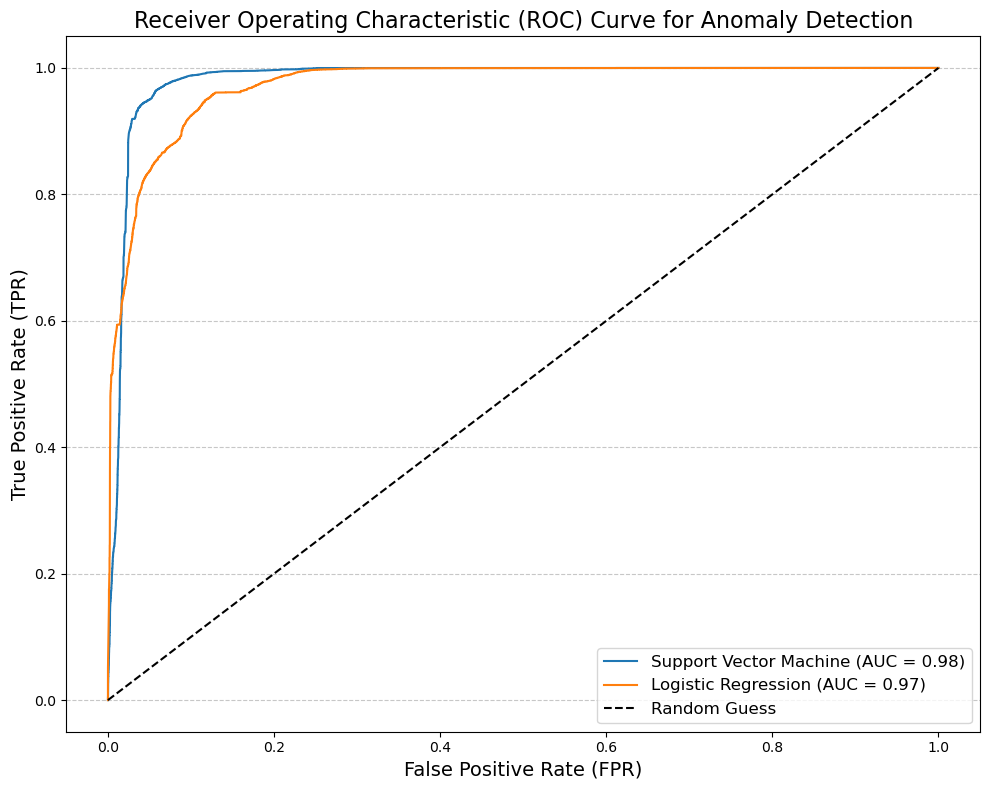

In [28]:
# Function to plot ROC curve for all models
def plot_roc_curve(y_true, model_scores, model_names):
    plt.figure(figsize=(10, 8))
    
    # Plot ROC curve for each model
    for scores, name in zip(model_scores, model_names):
        fpr, tpr, _ = roc_curve(y_true, scores)  # Calculate FPR and TPR
        auc = roc_auc_score(y_true, scores)  # Calculate AUC
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')  # Plot ROC curve
    
    # Plot the diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess')
    
    # Formatting
    plt.title('Receiver Operating Characteristic (ROC) Curve for Anomaly Detection', fontsize=16)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines
    
    # Show plot
    plt.tight_layout()
    plt.show()

y_true = y_test  # Match test labels with predictions

model_scores = [
    svm.decision_function(X_test_transformed),  # Use decision function instead of predict_proba
    lr.predict_proba(X_test_transformed)[:, 1],  # Logistic Regression: probability of class 1
]


model_names = [
    'Support Vector Machine',
    'Logistic Regression',
]

plot_roc_curve(y_true, model_scores, model_names)

The plotted ROC curves compare the classification performance of the Support Vector Machine (SVM) and Logistic Regression (LR) models, with their respective AUC values indicating their effectiveness in distinguishing between classes. A higher AUC suggests better model performance, so if one model's curve is consistently above the other (SVM), it demonstrates superior anomaly detection capability, while curves close to the diagonal (Logistic Regression) indicate weak predictive power.

# **Visualization of Anomaly Score Distributions**

 plot_anomaly_score_distribution visualizes the distribution of anomaly scores for normal and attack instances using kernel density estimation (KDE) plots. It also calculates a threshold based on the 5th percentile of anomaly scores and marks it with a dashed vertical line to indicate a potential decision boundary for anomaly detection.

The script creates a figure with two subplots to compare the anomaly score distributions for Support Vector Machine (SVM) and Logistic Regression models. It computes the decision scores from the SVM model and the attack probability from the Logistic Regression model, then plots both on separate axes

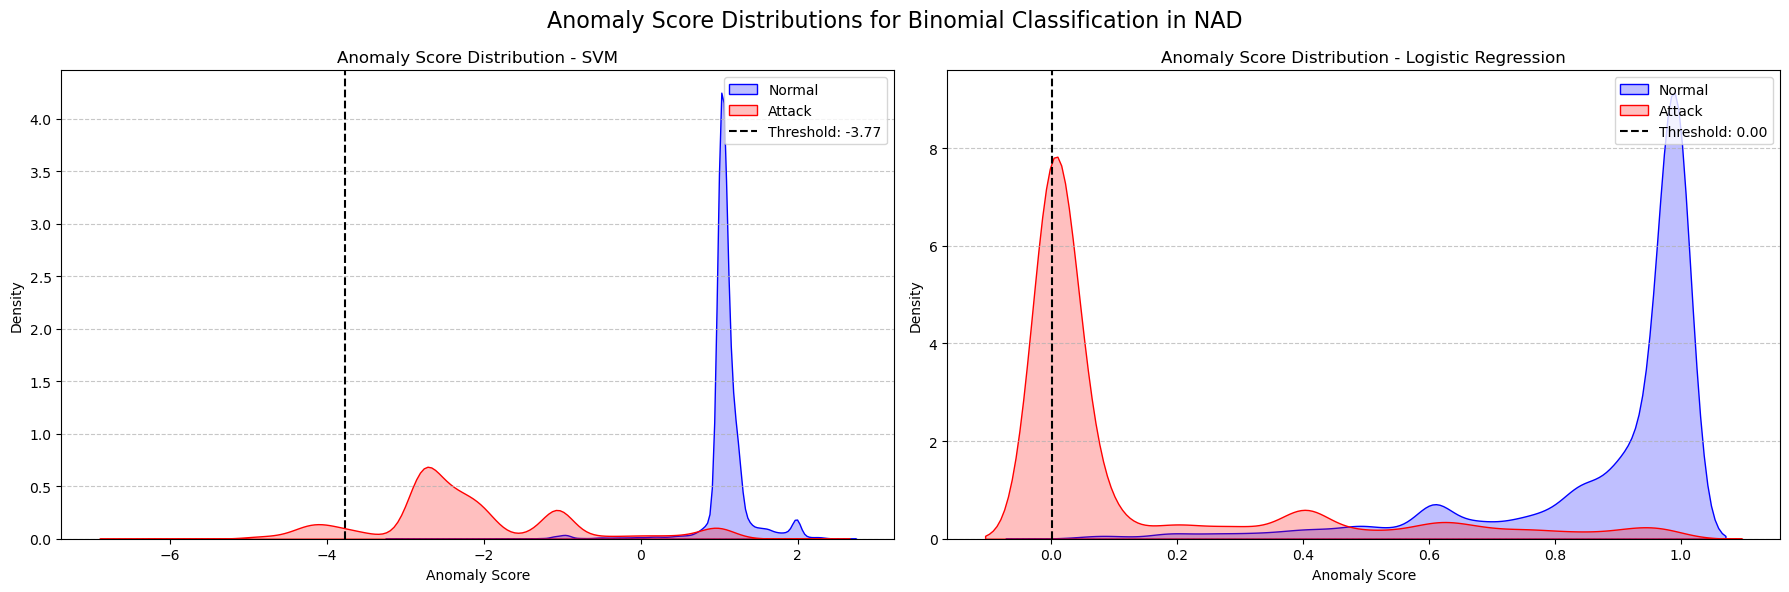

In [29]:
# Function to plot anomaly score distribution with threshold line
def plot_anomaly_score_distribution(ax, y_true, anomaly_scores, model_name):
    # Plot density for normal and attack classes
    sns.kdeplot(anomaly_scores[y_true == 1], label='Normal', color='blue', fill=True, ax=ax)
    sns.kdeplot(anomaly_scores[y_true == 0], label='Attack', color='red', fill=True, ax=ax)
    
    # Calculate threshold (e.g., 5th percentile of anomaly scores)
    threshold = np.percentile(anomaly_scores, 5)  # Adjust percentile as needed
    ax.axvline(threshold, color='black', linestyle='--', label=f'Threshold: {threshold:.2f}')
    
    # Formatting
    ax.set_title(f'Anomaly Score Distribution - {model_name}', fontsize=12)
    ax.set_xlabel('Anomaly Score', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend(loc="upper right", fontsize=10)
    
    # Add grid lines
    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines

y_true = y_test  # Ensure test labels are used

# Create a figure with exactly 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Ensure correct layout
fig.suptitle('Anomaly Score Distributions for Binomial Classification in NAD', fontsize=16)

# SVM
svm_scores = svm.decision_function(X_test_transformed)  # Decision function scores
plot_anomaly_score_distribution(axes[0], y_true, svm_scores, 'SVM')  # First subplot

# Logistic Regression
lr_scores = lr.predict_proba(X_test_transformed)[:, 1]  # Probability of being an attack
plot_anomaly_score_distribution(axes[1], y_true, lr_scores, 'Logistic Regression')  # Second subplot

# Adjust layout
plt.tight_layout()
plt.show()

The two KDE plots showing the anomaly score distributions for normal and attack instances, with the SVM plot on the left and the Logistic Regression plot on the right. Each plot includes a vertical dashed line representing the threshold, which helps visualize the separation between normal and attack instances based on their respective anomaly scores.

# Model Summary
* Model Performance Comparison for Anomaly Detection

Evaluates and compares the performance of a Support Vector Machine (SVM) and Logistic Regression model on a test dataset using accuracy, precision, recall, and F1-score as metrics. It first ensures the predicted labels have the correct shape before passing them to the evaluate_model function, which calculates the metrics and returns them as percentages.

If the predictions align correctly with the actual test labels, the performance results are stored in a DataFrame for better visualization. Finally, the code generates a bar chart and a table displaying the model evaluation metrics, ensuring clear comparative insights into their effectiveness.

y_test shape: (37792,)
SVM Predictions shape: (37792,)
Logistic Regression Predictions shape: (37792,)


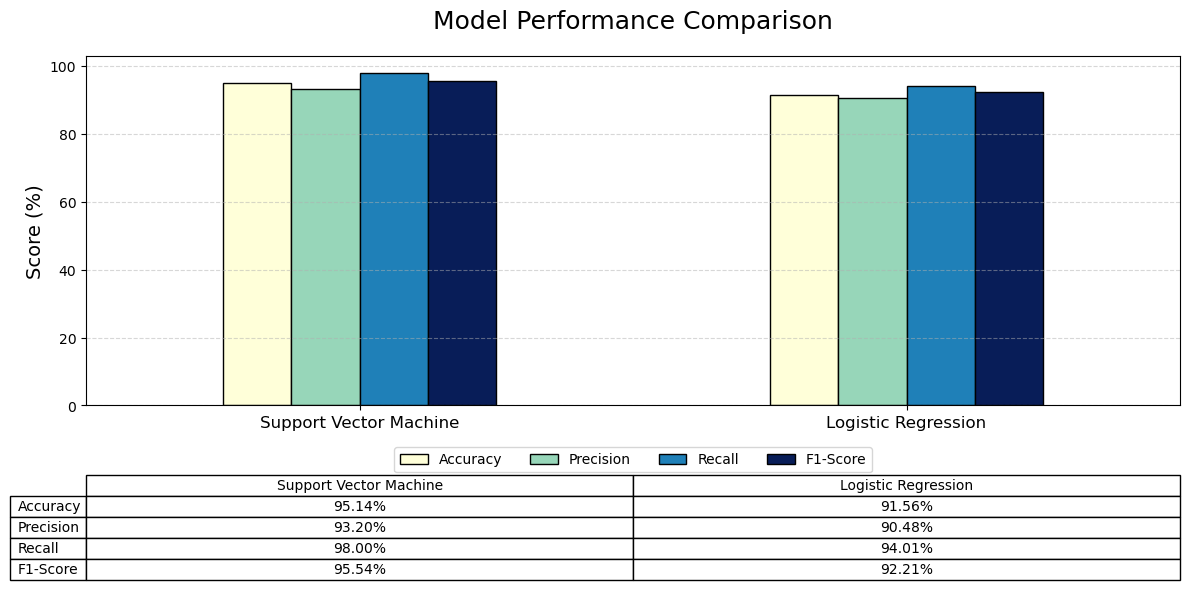

In [30]:
# Function to calculate performance metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_true, y_pred, average='binary') * 100  # Binary classification
    recall = recall_score(y_true, y_pred, average='binary') * 100  # Binary classification
    f1 = f1_score(y_true, y_pred, average='binary') * 100  # Binary classification
    return accuracy, precision, recall, f1

# Ensure correct y_true
y_true = y_test  # Must match X_test_transformed

# Ensure correct predictions
svm_test_pred = svm.predict(X_test_transformed)  # Binary predictions (0 or 1)
lr_test_pred = lr.predict(X_test_transformed)  # Binary predictions (0 or 1)

# Verify shapes before evaluation
print("y_test shape:", y_test.shape)
print("SVM Predictions shape:", svm_test_pred.shape)
print("Logistic Regression Predictions shape:", lr_test_pred.shape)

# Define models and their predictions 
models = {
    'Support Vector Machine': svm_test_pred,  
    'Logistic Regression': lr_test_pred,  
}

# Calculate metrics for each model
results = []
for model_name, y_pred in models.items():
    if y_true.shape != y_pred.shape:
        print(f"⚠️ Shape Mismatch: {model_name} - {y_pred.shape} vs y_test {y_true.shape}")
        continue  # Skip models with shape mismatches

    accuracy, precision, recall, f1 = evaluate_model(y_true, y_pred)
    results.append([accuracy, precision, recall, f1])

# Proceed with visualization only if valid results exist
if results:
    df_results = pd.DataFrame(results, index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
    df_results = df_results.applymap(lambda x: f"{x:.2f}%")

    df_plot = df_results.replace({'%': ''}, regex=True).astype(float)

    # Plot results
    fig, ax = plt.subplots(figsize=(12, 6))
    df_plot.T.plot(kind='bar', ax=ax, colormap="YlGnBu", edgecolor="black")
    plt.title("Model Performance Comparison", fontsize=18, pad=20)
    plt.ylabel("Score (%)", fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.legend(loc="upper center", ncol=4, fontsize=10, bbox_to_anchor=(0.5, -0.1))
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    table_data = df_results.values
    plt.table(cellText=table_data, rowLabels=df_results.index, colLabels=df_results.columns,
              cellLoc='center', loc='bottom', bbox=[0, -0.5, 1, 0.3])

    plt.subplots_adjust(bottom=0.3)
    plt.tight_layout()
    plt.show()


Output consists of a printed summary of the model evaluation metrics, including accuracy, precision, recall, and F1-score for both the Support Vector Machine (SVM) and Logistic Regression models. Additionally, has a bar chart visually comparing the models' performance and a table displaying the exact metric values, 

# Model saving

Selecting the best model whereby, model = svm refers to assigning the SVM model to the variable model.

In [31]:
# Best model
model= svm

joblib library saves the best machine learning model to a file for later use. The joblib.dump() function serializes and writes the model object to a file named model.pkl at the specified directory (C:/Users/Ouma Becks/Desktop/Projects/Personal/Webpage/).

In [32]:
import joblib
# Save the trained model
joblib.dump(model, 'C:/Users/Ouma Becks/Desktop/Projects/Personal/Webpage/model.pkl')

['C:/Users/Ouma Becks/Desktop/Projects/Personal/Webpage/model.pkl']